<a href="https://colab.research.google.com/github/htapiagroup/oscilaciones-de-masas-acopladas-por-resortes-EisaacJC/blob/master/Resortes_Acoplados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resortes Acoplados

---

## Introducción a la ciencia de datos
## Facultad de Física

## Universidad Veracruzana


---


### Emmanuel Isaac Juárez Caballero

Consideremos un sistema de dos resortes acoplados, si tenemos dos resortes acoplados, unidos por la presencia de tres resortes, uno que parte del origen a la primer masa, uno que los une en el intermedio y finalmente uno que está sujeto desde la segunda masa hasta la frontera.![Imagen de resortes](https://raw.githubusercontent.com/EisaacJC/Ciencia-de-Datos-Personal/master/resortes.PNG)

Las ecuaciones de movimiento para un sistema como este pueden ser facilmente deducibes en términos del lagrangiano del sistema, considerando la energía asociada al momiento y al potencial elástico, de las ecuaciones de Euler- Lagrange para un potencial que no depende explicitamente del tiempo tenemos:

\begin{equation}
    \frac{d}{dt}\frac{\partial L}{\partial \dot{q}_k} -\frac{\partial L}{\partial q_k}=0
\end{equation}
Siendo $L$ el lagrangiano del sistema definido por $$L=K+U$$ donde $K$ y $U$ son la energía cinética y potencial respectivamente, que para el caso de un oscilador corresponde a $K=\frac{1}{2}m\dot{x}^2$ y $U=-\frac{1}{2}kx^2$, de forma que se pueden obtener:
\begin{equation}
    m_1\ddot{x}=-k_1 x_1+k_{12}(x_2-1)\\
    m_2\ddot{x}=-k_3 x_2-k_12(x_2-x_1)
\end{equation}
De manera análoga se puede calcular las ecuaciones de Hamilton, obteniendo:
\begin{eqnarray}
H&=&\frac{1}{2m}P_1^2+\frac{1}{2m}P_2^2+\frac{1}{2}k_1x_1^2+\frac{1}{2}k_2(x_2-x_1)^2+\frac{1}{2}k_3x_2^2 \\
\dot{P_1}&=&-\frac{\partial H}{\partial x_1}=-k_1x_1+k_2(x_2-X_1) \\
\dot{P_2}&=&-\frac{\partial H}{\partial x_2}=-k_3x_2-k_2(x_2-X_1) \\
\dot{x_1}&=&\frac{\partial H}{\partial P_1}=\frac{P_1}{m_1} \\
\dot{x_2}&=&\frac{\partial H}{\partial P_2}=\frac{P_2}{m_1}
\end{eqnarray}




# Solución Numérica al problema


---



---



In [0]:
#Importando librerías útiles 
import numpy as np
import matplotlib.pyplot as plt
import time
#Definiendo las variables iniciales
k1=1.0
k12=2.0
k3=2.0
m1=1
m2=2
L=1,5
#Derivada del vectorQ
def Q_dot(Q):
    x1, x2, p1, p2= Q[0], Q[1], Q[2], Q[3]
    x1_dot= p1/m1
    x2_dot= p2/m2
    p1_dot = -k1*x1 + k12*(x2-x1)
    p2_dot = -k3*x2 - k12*(x2-x1)
    return np.array([x1_dot, x2_dot,  p1_dot, p2_dot])

In [0]:
#Defininicion del paso de euler, calculando la derivada de y(t)
def paso_euler(f, t_n, y_n, dt):
    y_dot=f(t_n,y_n)
    y_nmasuno= y_n+ dt*y_dot
    return y_nmasuno


In [0]:
def integrador_simple(f, t, y_0, dt):
    tiempo=time.time()
    t_0, t_f = t
    n = int((t_f - t_0)/dt)  
    d = len(y_0)  
    y_tray = np.zeros(((n+1), d))  
    t = np.linspace(t_0, t_f, n+1)  
    y_tray[0, :] = y_0
    tiempo=time.time()-tiempo
    for i in range(n):
        y_tray[i+1, :] = paso_euler(f, t[i], y_tray[i, :], dt)
    print("El tiempo de computo es"+str(tiempo))
    return t, y_tray

In [0]:
def Q_Dot_t(t,y):
  return Q_dot(y)

El tiempo de computo es0.0013515949249267578


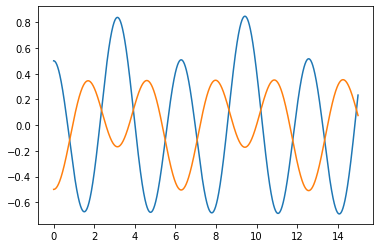

In [179]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[0.5, -0.5, 0, 0],.001 )
plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

# Cálculo de la energía
Para el cálculo de la energía en el programa podemos considerar realizar el estudio del valor de la energía cinética $K$ y de la energía potencial $U$, de forma que paraa el Hamiltoniano tendríamos una estructura de la forma:
\begin{equation}
H=K+U
\end{equation}
Dicha función es conveniente agregarla en la función de integrador simple, de esta forma tendría la estructura:




In [0]:
def Q_Dot(Q):
  x1, x2, p1, p2 = Q[0], Q[1], Q[2], Q[3]
  x1_dot = p1/m1
  x2_dot = p2/m2
  p1_dot = -k1*x1 + k2*(x2-x1)
  p2_dot = -k3*x2 - k2*(x2-x1)
  return np.array([x1_dot, x2_dot,  p1_dot, p2_dot])

In [0]:
def Q_Dot_t(t,y):
    return Q_Dot(y)

In [0]:
def paso_euler(f,t_n,y_n,dt):
  y_dot=f(t_n, y_n)
  y_n_mas_1=y_n+dt*y_dot
  return y_n_mas_1

In [0]:
def integrador_simple(f, t, y_0, dt):
    tiempo = time.time()
    t_0, t_f = t
    n = int((t_f - t_0)/dt)
    d = len(y_0)
    y_tray = np.zeros(((n+1), d))
    t = np.linspace(t_0, t_f, n+1)
    y_tray[0, :] = y_0
    U=np.zeros((n+1))
    T=np.zeros((n+1))
    H=np.zeros((n+1))
    tiempo = time.time() - tiempo
    for i in range(n):
        y_tray[i+1, :] = paso_euler(f, t[i], y_tray[i, :], dt)
        U[i+1]=1/2*k1*y_tray[i+1,0]**2+1/2*k3*y_tray[i+1,1]**2+1/2*k2*(y_tray[i+1,1]-y_tray[i+1,0])**2
        T[i+1]=(1/(2*m1))*(y_tray[i+1,2])**2+(1/(2*m2))*(y_tray[i+1,3])**2
        H[i+1]=U[i+1]+T[i+1]
    print('Tiempo de computo = ' + ('%.5f' %tiempo) + 's')

    return t, y_tray
  

Tiempo de computo = 0.00589s


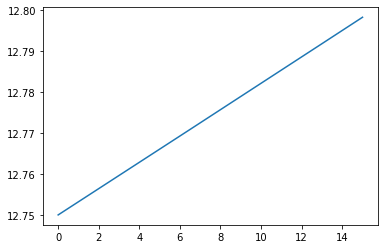

In [205]:
k1=1
k2= 1.5
k3 = 0.5
m1 = 0.5
m2 = 1.5
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[1, 1, 3, 3],.0001 )
E = np.zeros((Q_Traj.shape[0], 1))
E[:,0] = (1/(2*m1))*Q_Traj[:,2]**2 + (1/(2*m2))*Q_Traj[:,3]**2 + (k1/2)*Q_Traj[:,0]**2 + (k2/2)*(Q_Traj[:,1] - Q_Traj[:,0])**2 + (k3/2)*Q_Traj[:,1]**2
plt.plot(t,E)

El resultado anterior pareciera indicar que existe un aumento de energía, sin embargo esto lo podemos relacionar con el error numérico asociado a el cálculo

# Durante el fin de semana haré las modificaciones para N masas, intenté pero descubrí que mi definición estaba erronea y lo que calculaba era algo totalmente absurdo